# Week 1
---

## OLS
* OLS에서 w 계수 구하기
* R^2 값 구하기, TSS, RSS, ESS 구하기
* likelihood값 계산 (가우시안 정규분포를 가정)

## 가상 데이터 생성

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, bias=50, noise=50, random_state=0)

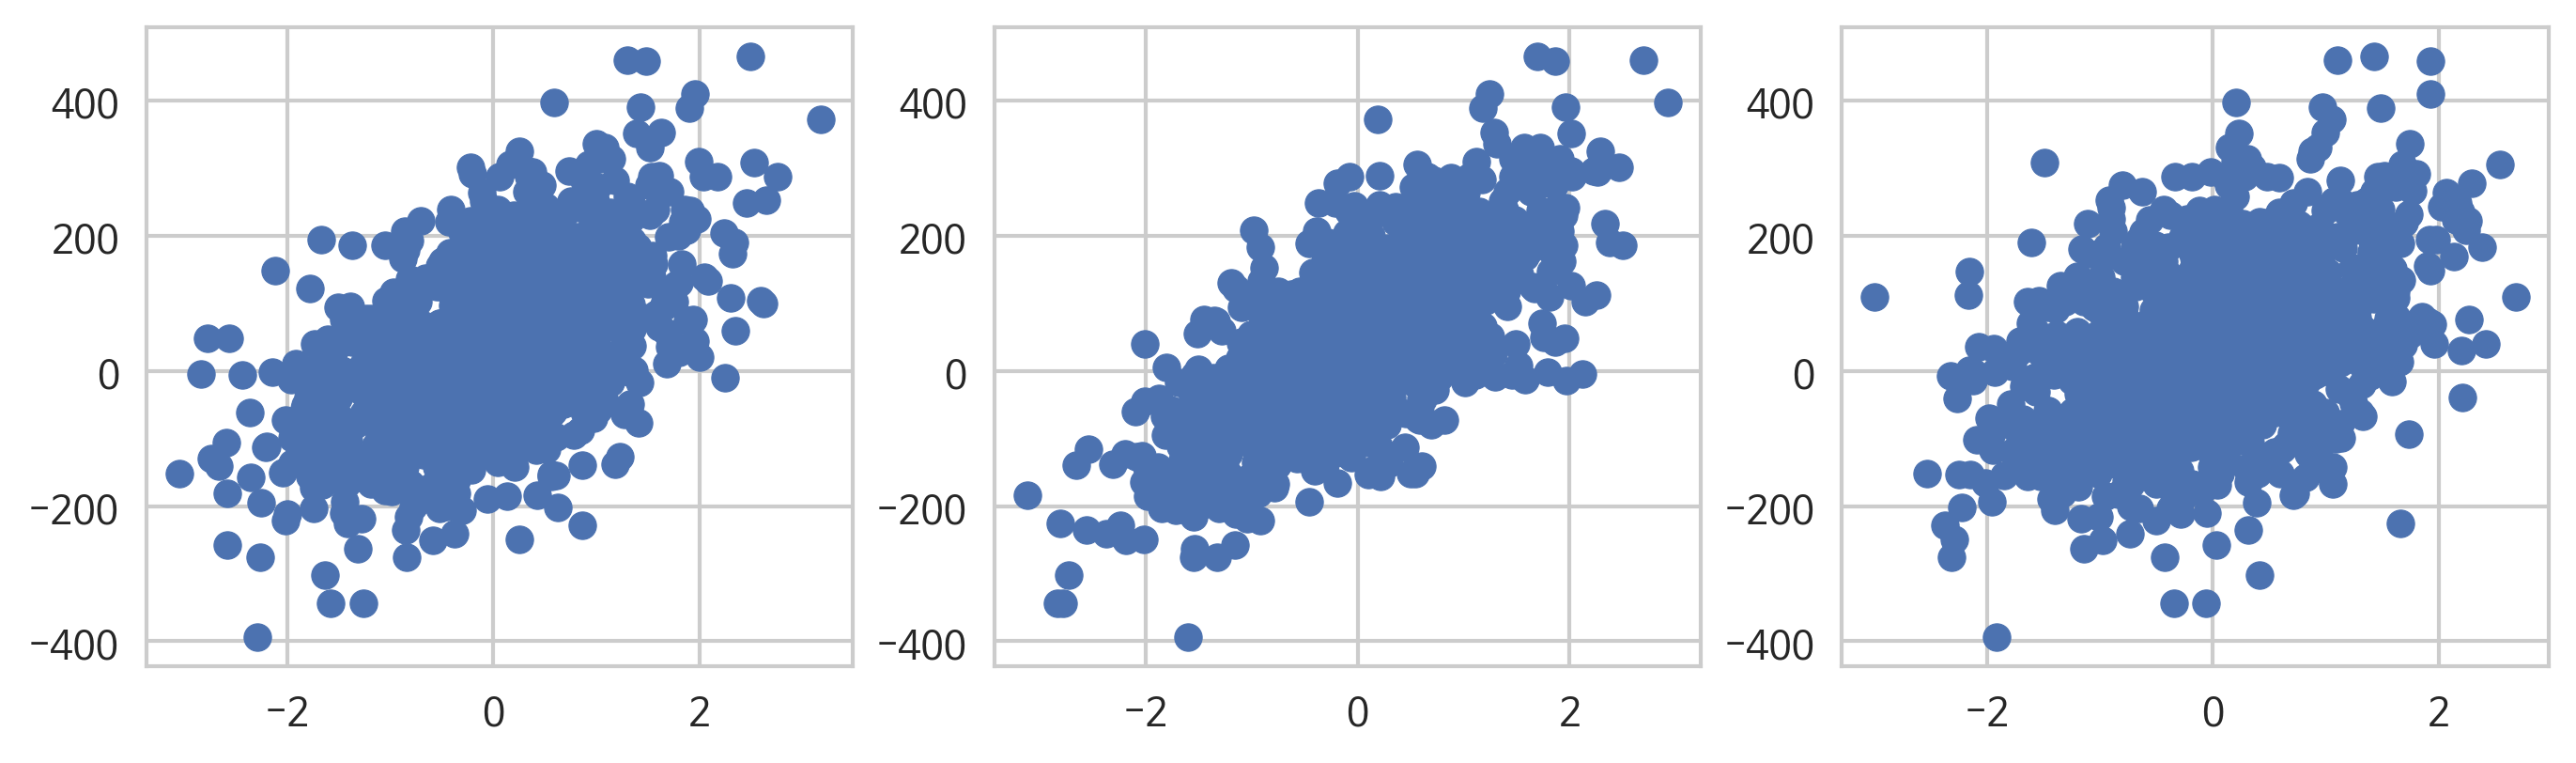

In [3]:
plt.figure(figsize=(11,3), dpi=300)
plt.subplot(131)
plt.scatter(X[:, 0], y)
plt.subplot(132)
plt.scatter(X[:, 1], y)
plt.subplot(133)
plt.scatter(X[:, 2], y)
plt.show()

## OLS

In [2]:
class OLS(object):    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = None
        self.resid = None
        self.TSS = None
        self.RSS = None
        self.R2 = None
        self.yhat = None
        
        
    def fit(self, arg=True):
        if arg:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), X))
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.X.transpose(), self.X)),self.X.transpose()), self.y)
        self.yhat = np.dot(self.X, self.w)
        self.resid = self.y - self.yhat
        # R-square
        self.TSS = ((self.yhat - self.y.mean())**2).sum() 
        self.RSS = (self.resid**2).sum()
        self.R2 = 1 - (self.RSS / self.TSS)
        
    def scatter(self):
        plt.figure(figsize=(7,7), dpi=100)
        plt.scatter(self.y, self.yhat)
        plt.xlabel('yhat')
        plt.ylabel('y')        
        plt.show()

In [3]:
model = OLS(X, y)

In [4]:
model.fit()

In [5]:
model.w

array([ 43.01966157,  97.54990084])

In [6]:
model.R2

0.75690448215604567

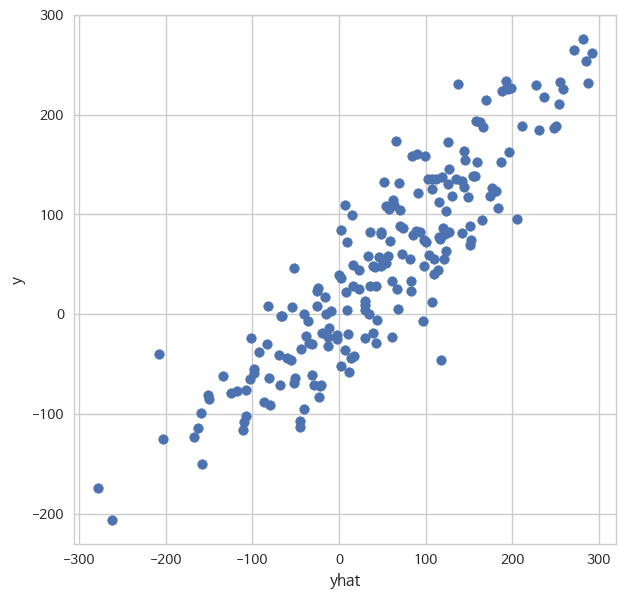

In [7]:
model.scatter()

## GD(Gradient Descent)
---
week 1내용은 아님

In [8]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [9]:
import sys
from matplotlib import animation
from IPython.display import HTML

In [10]:
def cost(X, y, W):
    m = X.shape[0]
    sqr_error = (np.dot(X, W) - y) ** 2
    return sqr_error.sum() / (2 * m)

In [11]:
def d_cost(X, y, W):
    m = X.shape[0]
    gradient = np.dot(X.T, (np.dot(X, W) - y)) / m
    return gradient

In [12]:
def gradient_descent(X, y, W0, n=1000, alpha=0.01):
    W = W0
    min_cost = np.inf
    history_ = {'epoch_val': [], 'cost_val': [], 'min_cost': [], 'W': [], 'y': []}
       
    for epoch in range(n):
        gradient = d_cost(X, y, W)
        W = W - alpha * gradient
        new_cost = cost(X, y, W)
            
        if round(min_cost, 8) == round(new_cost, 8):
            break
            
        if new_cost <= min_cost:
            min_cost = new_cost
        
        history_['epoch_val'].append(epoch)
        history_['cost_val'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))

    return W, history_

In [58]:
W0 = np.array([99, 591])

In [59]:
%time
w_val, history_ = gradient_descent(X, y, W0, n=1000, alpha=0.1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [14]:
w_val

array([ 43.01949791,  97.55006792])

In [15]:
model.w

array([ 43.01966157,  97.54990084])

### 찾아가는 과정

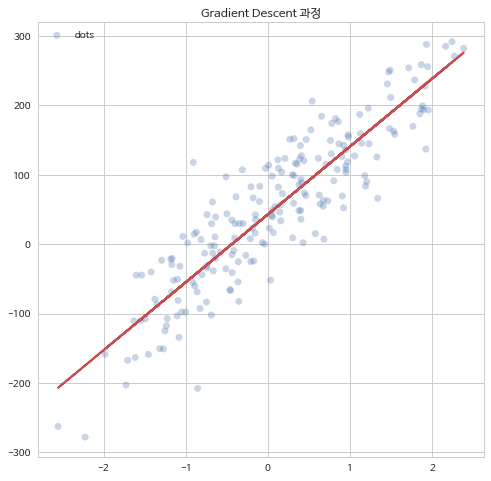

In [16]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
line, = ax1.plot([], [], 'r-', lw=2)
plt.scatter(X[:, 1], y, label='dots', alpha=0.3, edgecolors='none')
plt.title('Gradient Descent 과정')
plt.legend()
plt.grid(True)
fram = history_['epoch_val'][-1]

def animate(i):    
    xs = X[:, 1]
    ys = history_['y'][i]
    line.set_data(xs, ys)
    return line,

def init():
    line.set_data([], [])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=fram-70, interval=100, blit=True)
HTML(anim.to_html5_video())

## SGD(Stochastic Gradient Descent)

In [48]:
def nextbatch(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [49]:
def SGD(X, y, W0, max_iter=10000, alpha=0.01, batch_size=10):
    W = W0
    min_cost = np.inf
    new_cost = 10000000000000000
    epoch = 0
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'W': [], 'y': []}
    while ((new_cost / min_cost) < 0.999999) & (epoch < max_iter):
        min_cost = new_cost
        for (batchX, batchY) in nextbatch(X, y, batch_size):           
            gradient = d_cost(batchX, batchY, W)
            W = W - alpha * gradient
        
        new_cost = cost(batchX, batchY, W)
         
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))  
        
        if new_cost > min_cost:
            raise Exception("Not converging")
        epoch += 1
        
    return W, history_

In [57]:
%time
w_val_SGD, history_ = SGD(X, y, W0)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [51]:
w_val_SGD

array([ 43.11220589,  97.59226625])

In [52]:
model.w

array([ 43.01966157,  97.54990084])

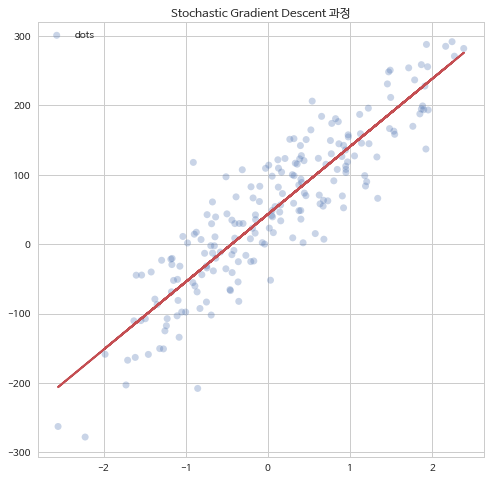

In [56]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
line, = ax1.plot([], [], 'r-', lw=2)
plt.scatter(X[:, 1], y, label='dots', alpha=0.3, edgecolors='none')
plt.title('Stochastic Gradient Descent 과정')
plt.legend()
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):    
    xs = X[:, 1]
    ys = history_['y'][i]
    line.set_data(xs, ys)
    return line,

def init():
    line.set_data([], [])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=fram, interval=100, blit=True)
HTML(anim.to_html5_video())

In [47]:
for i in range(history_['epoch'][-1]):
    print('# {0} | cost: {1} | min_cost:{2}'.format(history_['epoch'][i], history_['cost'][i], history_['min_cost'][i]))

# 0 | cost: 92376.86581328844 | min_cost:10000000000000000
# 1 | cost: 60931.94860142419 | min_cost:92376.86581328844
# 2 | cost: 40426.45510611295 | min_cost:60931.94860142419
# 3 | cost: 27031.504491520616 | min_cost:40426.45510611295
# 4 | cost: 18263.97563357651 | min_cost:27031.504491520616
# 5 | cost: 12512.09181216183 | min_cost:18263.97563357651
# 6 | cost: 8728.619200059504 | min_cost:12512.09181216183
# 7 | cost: 6232.359046739044 | min_cost:8728.619200059504
# 8 | cost: 4579.636138546761 | min_cost:6232.359046739044
# 9 | cost: 3481.0500531465805 | min_cost:4579.636138546761
# 10 | cost: 2747.509780728824 | min_cost:3481.0500531465805
# 11 | cost: 2255.2238400627875 | min_cost:2747.509780728824
# 12 | cost: 1922.9678442267737 | min_cost:2255.2238400627875
# 13 | cost: 1697.3094143360856 | min_cost:1922.9678442267737
# 14 | cost: 1542.9942664488397 | min_cost:1697.3094143360856
# 15 | cost: 1436.682619966126 | min_cost:1542.9942664488397
# 16 | cost: 1362.8624480338271 | min_